In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
%matplotlib inline
# Enable inline plotting
import os

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Pandas version 1.2.0
Matplotlib version 3.3.3


### Create data
 - List
 - dict  ( best suited for pandas , since any dataframe is comprised of key-value pairs )
 - tuples 

In [3]:
# The initial set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [4]:
zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables) --> A zip object yielding tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.
Type:           type
Subclasses:     


In [5]:
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

- We are basically done creating the data set. We now will use the pandas library to export this data set into a csv file.

- df will be a **DataFrame** object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside df.

In [6]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [7]:
df.to_csv?

Signature:
df.to_csv(
    path_or_buf: 'Optional[FilePathOrBuffer]' = None,
    sep: 'str' = ',',
    na_rep: 'str' = '',
    float_format: 'Optional[str]' = None,
    columns: 'Optional[Sequence[Label]]' = None,
    header: 'Union[bool_t, List[str]]' = True,
    index: 'bool_t' = True,
    index_label: 'Optional[IndexLabel]' = None,
    mode: 'str' = 'w',
    encoding: 'Optional[str]' = None,
    compression: 'CompressionOptions' = 'infer',
    quoting: 'Optional[int]' = None,
    quotechar: 'str' = '"',
    line_terminator: 'Optional[str]' = None,
    chunksize: 'Optional[int]' = None,
    date_format: 'Optional[str]' = None,
    doublequote: 'bool_t' = True,
    escapechar: 'Optional[str]' = None,
    decimal: 'str' = '.',
    errors: 'str' = 'strict',
    storage_options: 'StorageOptions' = None,
) -> 'Optional[str]'
Docstring:
Write object to a comma-separated values (csv) file.

.. versionchanged:: 0.24.0
    The order of arguments for Series was changed.

Parameters
----------
p

### Converting Dataframe to CSV file

In [8]:
df.to_csv('data/births1880.csv',index=False,header=False)

### Get data
 - To pull in the csv file, we will use the pandas function read_csv. Let us take a look at this function and what inputs it takes.

In [9]:
file1 = os.path.abspath('data/births1880.csv')
df1 = pd.read_csv(file1)

In [10]:
df1

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


- This brings us to the first problem of the exercise. The **read_csv function** treated the first record in the csv file as the header names. This is obviously not correct since the text file did not provide us with header names.

- To correct this we will pass the header parameter to the read_csv function and set it to None (means null in python).

In [11]:
df1 = pd.read_csv(file1,names=['Names','Births'])
df1

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


- You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of the index of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.

- [Names, Births] can be though of as column headers similar to the ones found in an Excel spreadsheet or sql database.

### Deleting the csv

In [12]:
import os
os.remove(file1)

In [13]:
df.to_csv('data/births1880.csv',index=False)

### Prepare Data
    The data we have consists of baby names and the number of births in the year 1880. We already know that we have 5 records and none of the records are missing (non-null values).

    The Names column at this point is of no concern since it most likely is just composed of alpha numeric strings (baby names). There is a chance of bad data in this column but we will not worry about that at this point of the analysis. The Births column should just contain integers representing the number of babies born in a specific year with a specific name. We can check if the all the data is of the data type integer. It would not make sense to have this column have a data type of float. I would not worry about any possible outliers at this point of the analysis.

    Realize that aside from the check we did on the "Names" column, briefly looking at the data inside the dataframe should be as far as we need to go at this stage of the game. As we continue in the data analysis life cycle we will have plenty of opportunities to find any issues with the data set.

In [14]:
# Check data type of the columns
df.dtypes

Names     object
Births     int64
dtype: object

In [15]:
# Check data type of Births column
df.Births.dtype

dtype('int64')

    As you can see the Births column is of type int64, thus no floats (decimal numbers) or alpha numeric characters will be present in this column.

### Analyze Data
    To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

    - Sort the dataframe and select the top row
    - Use the max() attribute to find the maximum value

In [16]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Names,Births
4,Mel,973


In [17]:
# Method 2:
df['Births'].max()

973

### Present Data
- Here we can plot the Births column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that Mel is the most popular baby name in the data set.

- plot() is a convinient attribute where pandas lets you painlessly plot the data in your dataframe. We learned how to find the maximum value of the Births column in the previous section. Now to find the actual baby name of the 973 value looks a bit tricky, so lets go over it.

    Explain the pieces:
    - df['Names'] - This is the entire list of baby names, the entire Names column
    - df['Births'] - This is the entire list of Births in the year 1880, the entire Births column
    - df['Births'].max() - This is the maximum value found in the Births column

    - [df['Births'] == df['Births'].max()] IS EQUAL TO [Find all of the records in the Births column where it is equal to 973]
    - df['Names'][df['Births'] == df['Births'].max()] IS EQUAL TO Select all of the records in the Names column WHERE [The Births column is equal to 973]

- An alternative way could have been to use the Sorted dataframe:
- Sorted['Names'].head(1).value

- The str() function simply converts an object into a string.

The most popular name


,Names,Births
4,Mel,973


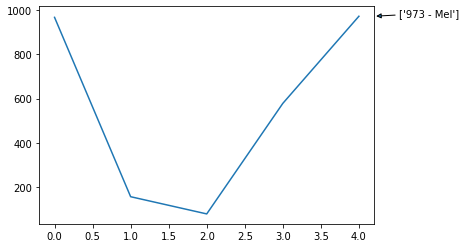

In [18]:
# Create graph
df['Births'].plot()

# Maximum value in the data set
MaxValue = df['Births'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), 
                   xytext=(25, 0), 
                   xycoords=('axes fraction', 'data'), 
                   textcoords='offset points',
                   arrowprops=dict(arrowstyle='-|>'))

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used

### Import new file and practise

## 1.1 Reading data from a csv file Or excel file 
 - use pd.read_excel() to load excel data.

In [19]:
# automatically retrives the location of file. # used when sharing
file = os.path.abspath('data/bestsellers with categories.csv')   

In [20]:
books = pd.read_csv(file)

In [21]:
# Look at the first 3 rows using slicing method
books[:3]

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


##### bikes.head() --> will return first 5 rows present in the bestsellers with categories.csv file

In [22]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


##### bikes.tail() --> will return last 5 rows present in the bestsellers with categories.csv file

In [23]:
books.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [24]:
books.head(10) # returns first 10 records 

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [25]:
books.tail(10) # returns last 10 records

,Name,Author,User Rating,Reviews,Price,Year,Genre
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [26]:
books.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [27]:
books.Name.dtypes  # O --> represents Object

dtype('O')

In [28]:
books['User Rating'].dtypes

dtype('float64')

In [29]:
books = books.sort_values(by='User Rating',ascending=False)

In [30]:
books.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction


In [31]:
books['User Rating'][:1]

431    4.9
Name: User Rating, dtype: float64

In [32]:
books['User Rating'].max()

4.9

In [33]:
books['User Rating'].min()

3.3

In [34]:
books['User Rating'].mean()

4.618363636363636

In [35]:
books['User Rating'].median()

4.7

In [36]:
books['User Rating'].mode()

0    4.8
dtype: float64

In [37]:
books['Price'].max()

105

In [38]:
plt.style.use('seaborn-whitegrid')

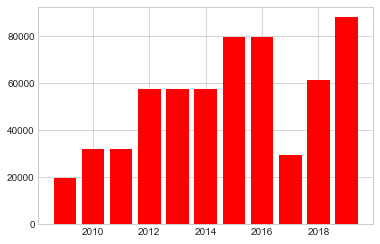

In [39]:
# Create graph
fig = plt.figure()
ax = plt.axes()
plot = plt.bar(books['Year'],books['Reviews'],color='red')